# STAT 6289 HW2 

Xue Ming Wang (G20580112)

### 1.

In [4]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

In [5]:
batch_size = 512
num_classes = 10
epochs = 10
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
    input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [7]:
# initiate RMSprop optimizer
opt = keras.optimizers.legacy.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
  optimizer=opt,
  metrics=['accuracy'])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
if not data_augmentation:
  print('Not using data augmentation.')
  model.fit(x_train, y_train,
      batch_size=batch_size,
      epochs=epochs,
      validation_data=(x_test, y_test),
      shuffle=True)
else:
  print('Using real-time data augmentation.')
  # This will do preprocessing and realtime data augmentation:
  datagen = ImageDataGenerator(
    featurewise_center=False, # set input mean to 0 over the dataset
    samplewise_center=False, # set each sample mean to 0
    featurewise_std_normalization=False, # divide inputs by std of the dataset
    samplewise_std_normalization=False, # divide each input by its std
    zca_whitening=False, # apply ZCA whitening
    zca_epsilon=1e-06, # epsilon for ZCA whitening
    rotation_range=0, # randomly rotate images in the range (degrees, 0 to 180)
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,
    shear_range=0., # set range for random shear
    zoom_range=0., # set range for random zoom
    channel_shift_range=0., # set range for random channel shifts
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    cval=0., # value used for fill_mode = "constant"
    horizontal_flip=True, # randomly flip images
    vertical_flip=False, # randomly flip images
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # image data format, either "channels_first" or "channels_last"
    data_format=None,
    # fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0.0)
  # Compute quantities required for feature-wise normalization
  # (std, mean, and principal components if ZCA whitening is applied).
  datagen.fit(x_train)

  # Fit the model on the batches generated by datagen.flow().
  history_cnn = model.fit_generator(datagen.flow(x_train, y_train,
                  batch_size=batch_size),
            epochs=epochs,
            validation_data=(x_test, y_test),
            workers=4)

Using real-time data augmentation.


/var/folders/93/b531zk911js9h3xpnm3db4x00000gn/T/ipykernel_40416/2706874013.py:55: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_cnn = model.fit_generator(datagen.flow(x_train, y_train,


Epoch 1/10
98/98 [==============================] - 130s 1s/step - loss: 2.1507 - accuracy: 0.1994 - val_loss: 1.9579 - val_accuracy: 0.3161
Epoch 2/10
98/98 [==============================] - 135s 1s/step - loss: 1.9227 - accuracy: 0.3011 - val_loss: 1.8077 - val_accuracy: 0.3618
Epoch 3/10
98/98 [==============================] - 127s 1s/step - loss: 1.8107 - accuracy: 0.3434 - val_loss: 1.6925 - val_accuracy: 0.3961
Epoch 4/10
98/98 [==============================] - 130s 1s/step - loss: 1.7522 - accuracy: 0.3642 - val_loss: 1.6367 - val_accuracy: 0.4107
Epoch 5/10
98/98 [==============================] - 122s 1s/step - loss: 1.7066 - accuracy: 0.3817 - val_loss: 1.5993 - val_accuracy: 0.4216
Epoch 6/10
98/98 [==============================] - 127s 1s/step - loss: 1.6666 - accuracy: 0.3920 - val_loss: 1.5673 - val_accuracy: 0.4372
Epoch 7/10
98/98 [==============================] - 122s 1s/step - loss: 1.6392 - accuracy: 0.4025 - val_loss: 1.6404 - val_accuracy: 0.4104
Epoch 8/10
98

In [8]:
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /Users/vivianwang/saved_models/keras_cifar10_trained_model.h5 


/Users/vivianwang/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:

scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 7s 23ms/step - loss: 1.4184 - accuracy: 0.4917
Test loss: 1.4183833599090576
Test accuracy: 0.4916999936103821


## Problem (a)

/var/folders/93/b531zk911js9h3xpnm3db4x00000gn/T/ipykernel_40416/405503859.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train, y_train,


Epoch 1/10
98/98 [==============================] - 31s 301ms/step - loss: 2.1627 - accuracy: 0.2123 - val_loss: 2.0412 - val_accuracy: 0.2807
Epoch 2/10
98/98 [==============================] - 31s 302ms/step - loss: 2.0185 - accuracy: 0.2864 - val_loss: 1.9609 - val_accuracy: 0.3173
Epoch 3/10
98/98 [==============================] - 28s 268ms/step - loss: 1.9677 - accuracy: 0.3085 - val_loss: 1.9186 - val_accuracy: 0.3303
Epoch 4/10
98/98 [==============================] - 28s 272ms/step - loss: 1.9406 - accuracy: 0.3172 - val_loss: 1.8954 - val_accuracy: 0.3440
Epoch 5/10
98/98 [==============================] - 27s 267ms/step - loss: 1.9203 - accuracy: 0.3281 - val_loss: 1.8781 - val_accuracy: 0.3445
Epoch 6/10
98/98 [==============================] - 28s 279ms/step - loss: 1.9074 - accuracy: 0.3333 - val_loss: 1.8584 - val_accuracy: 0.3574
Epoch 7/10
98/98 [==============================] - 27s 262ms/step - loss: 1.8976 - accuracy: 0.3364 - val_loss: 1.8526 - val_accuracy: 0.3541

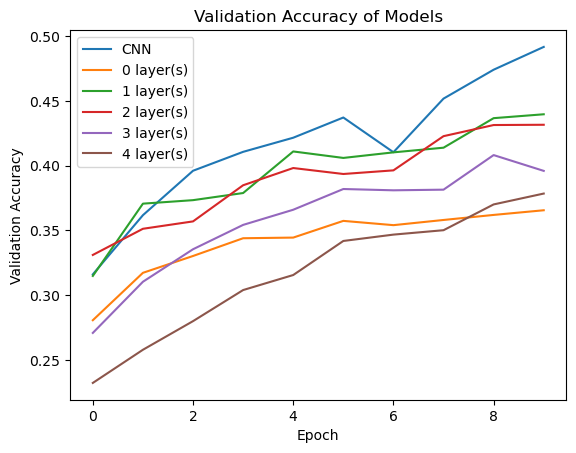

In [10]:
import matplotlib.pyplot as plt

val_accuracy_list = []

for num_layers in range(5):
    model = Sequential()
    model.add(Flatten())
    
    for _ in range(num_layers):
        model.add(Dense(512))
        model.add(Activation('relu'))
        model.add(Dropout(0.5))

    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])

    history = model.fit_generator(datagen.flow(x_train, y_train,
                                  batch_size=batch_size),
                                  epochs=epochs,
                                  validation_data=(x_test, y_test),
                                  workers=4)
    
    val_accuracy_list.append(history.history['val_accuracy'])

plt.plot(history_cnn.history['val_accuracy'], label='CNN')
for num_layers, val_accuracy in enumerate(val_accuracy_list):
    plt.plot(val_accuracy, label=f'{num_layers} layer(s)')

plt.title('Validation Accuracy of Models')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.savefig('validation_accuracy.png')
plt.show()


**Problem (a)**: In the plot, the convolutional neural network (CNN) mostly outperforms simple dense neural networks with varying numbers of hidden layers. The superiority of the CNN arises from its sparse nature with shared weights. As the number of dense hidden layers increases from 1 to 4, the test accuracy tends to decrease. The optimization process becomes more challenging, particularly for the optimizer (rmsprop), which struggles to converge to the best weights. The CNN's advantages stem from its ability to simplify optimization and generalize well with less data.

## Problem (b)

In [43]:
import matplotlib.pyplot as plt
from keras.layers import Activation
from keras.optimizers import RMSprop
batch_size = 512
num_classes = 10
epochs = 10
data_augmentation = True
num_predictions = 20
def create_sigmoid_cnn_model():
    model7 = Sequential()
    model7.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
    model7.add(Activation('sigmoid'))
    model7.add(Conv2D(32, (3, 3)))
    model7.add(Activation('sigmoid'))
    model7.add(MaxPooling2D(pool_size=(2, 2)))
    model7.add(Dropout(0.25))

    model7.add(Conv2D(64, (3, 3), padding='same'))
    model7.add(Activation('sigmoid'))
    model7.add(Conv2D(64, (3, 3)))
    model7.add(Activation('sigmoid'))
    model7.add(MaxPooling2D(pool_size=(2, 2)))
    model7.add(Dropout(0.25))

    model7.add(Flatten())
    model7.add(Dense(512))
    model7.add(Activation('sigmoid'))
    model7.add(Dropout(0.5))
    model7.add(Dense(num_classes))
    model7.add(Activation('softmax'))

    opt = keras.optimizers.legacy.RMSprop(learning_rate=0.0001, decay=1e-6)
    model7.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])

    return model7


model7 = create_sigmoid_cnn_model()

Sig = model7.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                       epochs=epochs, validation_data=(x_test, y_test), workers=4)



Epoch 1/10
98/98 [==============================] - 142s 1s/step - loss: 2.3832 - accuracy: 0.0981 - val_loss: 2.3048 - val_accuracy: 0.1000
Epoch 2/10
98/98 [==============================] - 143s 1s/step - loss: 2.3070 - accuracy: 0.0999 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 3/10
98/98 [==============================] - 152s 2s/step - loss: 2.3041 - accuracy: 0.1022 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
98/98 [==============================] - 147s 1s/step - loss: 2.2827 - accuracy: 0.1236 - val_loss: 2.1674 - val_accuracy: 0.1833
Epoch 5/10
98/98 [==============================] - 150s 2s/step - loss: 2.1088 - accuracy: 0.1941 - val_loss: 2.0554 - val_accuracy: 0.2291
Epoch 6/10
98/98 [==============================] - 141s 1s/step - loss: 2.0484 - accuracy: 0.2262 - val_loss: 1.9910 - val_accuracy: 0.2625
Epoch 7/10
98/98 [==============================] - 144s 1s/step - loss: 2.0140 - accuracy: 0.2438 - val_loss: 1.9555 - val_accuracy: 0.2827
Epoch 8/10
98

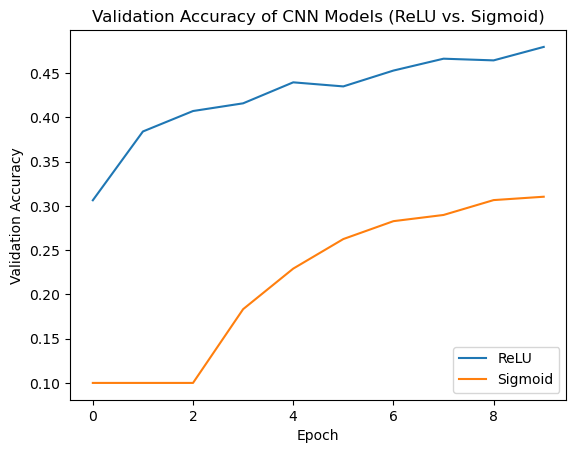

In [44]:
plt.plot(history_cnn.history['val_accuracy'], label='ReLU')
plt.plot(Sig.history['val_accuracy'], label='Sigmoid')
plt.title('Validation Accuracy of CNN Models (ReLU vs. Sigmoid)')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

**Problem (B)**: In the plot, ReLU consistently outperforms sigmoid units, and the key reason behind this difference is how they tackle the gradient vanishing issue. The ReLU curve starts at around 0.3 accuracy and gradually rises to approximately 0.5 within the first 10 epochs, with some minor fluctuations. Even after 7 epochs, the ReLU curve continues to increase, although the rate of improvement slows down. Conversely, the sigmoid units start with near-zero accuracy and experience a noticeable increase around the 2nd epoch, ultimately reaching around 0.3. Like ReLU, the sigmoid curve levels off around the 7th epoch. However, the crucial distinction is that the sigmoid curve consistently falls behind the ReLU curve in terms of accuracy. This performance gap is due to ReLU's ability to maintain a non-vanishing gradient for positive inputs, allowing for more effective learning in deep networks. The sparsity introduced by ReLU also aids feature learning and helps prevent overfitting, further contributing to its superior performance. Therefore, the ReLU model outperforms the sigmoid model.

## Problem (c)

In [45]:
epochs = 20
data_augmentation = True
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

if not data_augmentation:
    print('Data augmentation is not used.')
    NoD_A = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)
else:
    print('Real-time data augmentation is used.')
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        zca_epsilon=1e-06,
        rotation_range=0,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.,
        zoom_range=0.,
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    datagen.fit(x_train)

    NoD_A = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs, validation_data=(x_test, y_test), workers=4)


Real-time data augmentation is used.


/var/folders/93/b531zk911js9h3xpnm3db4x00000gn/T/ipykernel_3630/1711443014.py:51: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  NoD_A = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs, validation_data=(x_test, y_test), workers=4)


Epoch 1/20
98/98 [==============================] - 136s 1s/step - loss: 5.6871 - accuracy: 0.1992 - val_loss: 2.3410 - val_accuracy: 0.2831
Epoch 2/20
98/98 [==============================] - 130s 1s/step - loss: 1.9472 - accuracy: 0.3276 - val_loss: 1.8605 - val_accuracy: 0.3621
Epoch 3/20
98/98 [==============================] - 144s 1s/step - loss: 1.6526 - accuracy: 0.4109 - val_loss: 1.4791 - val_accuracy: 0.4749
Epoch 4/20
98/98 [==============================] - 133s 1s/step - loss: 1.5071 - accuracy: 0.4649 - val_loss: 1.4546 - val_accuracy: 0.4823
Epoch 5/20
98/98 [==============================] - 128s 1s/step - loss: 1.4270 - accuracy: 0.4949 - val_loss: 1.3496 - val_accuracy: 0.5267
Epoch 6/20
98/98 [==============================] - 130s 1s/step - loss: 1.3623 - accuracy: 0.5206 - val_loss: 1.2813 - val_accuracy: 0.5516
Epoch 7/20
98/98 [==============================] - 139s 1s/step - loss: 1.3077 - accuracy: 0.5396 - val_loss: 1.1886 - val_accuracy: 0.5852
Epoch 8/20
98

In [46]:
epochs = 20
data_augmentation = True

# Model with data augmentation, but no dropout
model8 = Sequential()
model8.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model8.add(Activation('relu'))
model8.add(Conv2D(32, (3, 3)))
model8.add(Activation('relu'))
model8.add(MaxPooling2D(pool_size=(2, 2)))

model8.add(Conv2D(64, (3, 3), padding='same'))
model8.add(Activation('relu'))
model8.add(Conv2D(64, (3, 3)))
model8.add(Activation('relu'))
model8.add(MaxPooling2D(pool_size=(2, 2)))

model8.add(Flatten())
model8.add(Dense(512))
model8.add(Activation('relu'))
model8.add(Dense(num_classes))
model8.add(Activation('softmax'))

model8.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

if not data_augmentation:
    print('Not using data augmentation.')
    NoD_A = model8.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)
else:
    print('Using real-time data augmentation.')
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        zca_epsilon=1e-06,
        rotation_range=0,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.,
        zoom_range=0.,
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0
    )

    datagen.fit(x_train)

    NoD_A = model8.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs, validation_data=(x_test, y_test), workers=4)

# Model with dropout, but no data augmentation 
model9 = Sequential()
model9.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model9.add(Activation('relu'))
model9.add(Conv2D(32, (3, 3)))
model9.add(Activation('relu'))
model9.add(MaxPooling2D(pool_size=(2, 2)))
model9.add(Dropout(0.25))

model9.add(Conv2D(64, (3, 3), padding='same'))
model9.add(Activation('relu'))
model9.add(Conv2D(64, (3, 3)))
model9.add(Activation('relu'))
model9.add(MaxPooling2D(pool_size=(2, 2)))
model9.add(Dropout(0.25))

model9.add(Flatten())
model9.add(Dense(512))
model9.add(Activation('relu'))
model9.add(Dropout(0.5))
model9.add(Dense(num_classes))
model9.add(Activation('softmax'))

model9.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

data_augmentation = False

if not data_augmentation:
    print('Not using data augmentation.')
    D_NoA = model9.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)
else:
    print('Using real-time data augmentation.')
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        zca_epsilon=1e-06,
        rotation_range=0,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.,
        zoom_range=0.,
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0
    )

    datagen.fit(x_train)

    D_NoA = model9.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs, validation_data=(x_test, y_test), workers=4)

Using real-time data augmentation.


/var/folders/93/b531zk911js9h3xpnm3db4x00000gn/T/ipykernel_3630/2957728959.py:56: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  NoD_A = model8.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs, validation_data=(x_test, y_test), workers=4)


Epoch 1/20
98/98 [==============================] - 146s 1s/step - loss: 5.3606 - accuracy: 0.2103 - val_loss: 2.3548 - val_accuracy: 0.2840
Epoch 2/20
98/98 [==============================] - 142s 1s/step - loss: 1.9115 - accuracy: 0.3428 - val_loss: 1.6115 - val_accuracy: 0.4256
Epoch 3/20
98/98 [==============================] - 130s 1s/step - loss: 1.6103 - accuracy: 0.4259 - val_loss: 1.5680 - val_accuracy: 0.4515
Epoch 4/20
98/98 [==============================] - 128s 1s/step - loss: 1.4918 - accuracy: 0.4699 - val_loss: 1.3367 - val_accuracy: 0.5208
Epoch 5/20
98/98 [==============================] - 140s 1s/step - loss: 1.4109 - accuracy: 0.5014 - val_loss: 1.3393 - val_accuracy: 0.5283
Epoch 6/20
98/98 [==============================] - 133s 1s/step - loss: 1.3471 - accuracy: 0.5238 - val_loss: 1.2499 - val_accuracy: 0.5600
Epoch 7/20
98/98 [==============================] - 129s 1s/step - loss: 1.2971 - accuracy: 0.5433 - val_loss: 1.1990 - val_accuracy: 0.5783
Epoch 8/20
98

In [47]:
epochs = 20
data_augmentation = False

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

if not data_augmentation:
    print('Not using data augmentation.')
    NDNA = model.fit(x_train, y_train,
                     batch_size=batch_size,
                     epochs=epochs,
                     validation_data=(x_test, y_test),
                     shuffle=True)
else:
    print('Using real-time data augmentation.')
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        zca_epsilon=1e-06,
        rotation_range=0,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.,
        zoom_range=0.,
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0
    )

    datagen.fit(x_train)

    NDNA = model.fit_generator(datagen.flow(x_train, y_train,
                                           batch_size=batch_size),
                              epochs=epochs,
                              validation_data=(x_test, y_test),
                              workers=4)

Not using data augmentation.
Epoch 1/20
98/98 [==============================] - 196s 2s/step - loss: 2.8210 - accuracy: 0.2804 - val_loss: 1.7655 - val_accuracy: 0.3640
Epoch 2/20
98/98 [==============================] - 144s 1s/step - loss: 1.5951 - accuracy: 0.4306 - val_loss: 1.5234 - val_accuracy: 0.4526
Epoch 3/20
98/98 [==============================] - 165s 2s/step - loss: 1.3917 - accuracy: 0.5063 - val_loss: 1.3997 - val_accuracy: 0.5042
Epoch 4/20
98/98 [==============================] - 120s 1s/step - loss: 1.2603 - accuracy: 0.5569 - val_loss: 1.3364 - val_accuracy: 0.5271
Epoch 5/20
98/98 [==============================] - 116s 1s/step - loss: 1.1579 - accuracy: 0.5938 - val_loss: 1.2859 - val_accuracy: 0.5509
Epoch 6/20
98/98 [==============================] - 114s 1s/step - loss: 1.0668 - accuracy: 0.6272 - val_loss: 1.2710 - val_accuracy: 0.5602
Epoch 7/20
98/98 [==============================] - 101s 1s/step - loss: 0.9985 - accuracy: 0.6518 - val_loss: 1.2300 - val_a

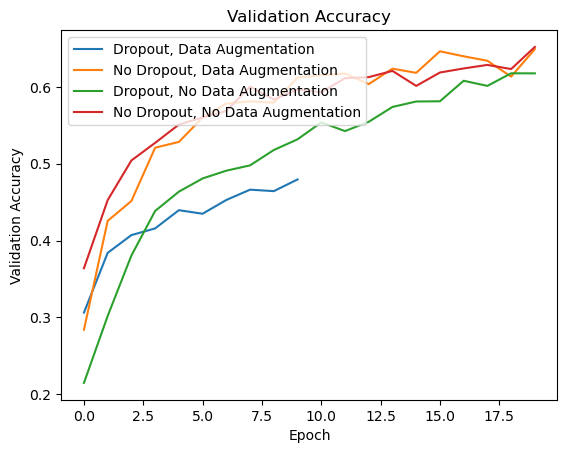

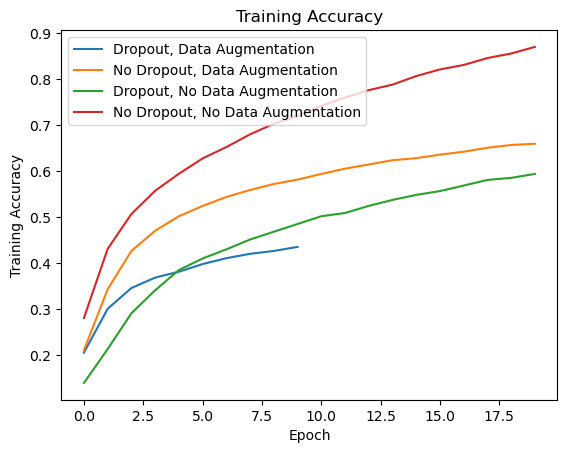

In [48]:
import matplotlib.pyplot as plt

# validation accuracy
plt.plot(history_cnn.history['val_accuracy'])
plt.plot(NoD_A.history['val_accuracy'])
plt.plot(D_NoA.history['val_accuracy'])
plt.plot(NDNA.history['val_accuracy'])
plt.title('Validation Accuracy')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.legend(['Dropout, Data Augmentation', 'No Dropout, Data Augmentation', 'Dropout, No Data Augmentation', 'No Dropout, No Data Augmentation'], loc='upper left')
plt.savefig('validation_accuracy.png')
plt.show()

# training accuracy
plt.plot(history_cnn.history['accuracy'])
plt.plot(NoD_A.history['accuracy'])
plt.plot(D_NoA.history['accuracy'])
plt.plot(NDNA.history['accuracy'])
plt.title('Training Accuracy')
plt.ylabel('Training Accuracy')
plt.xlabel('Epoch')
plt.legend(['Dropout, Data Augmentation', 'No Dropout, Data Augmentation', 'Dropout, No Data Augmentation', 'No Dropout, No Data Augmentation'], loc='upper left')
plt.show()


**Problem (c)**: From the plot, model without dropout and data augmentation learned quicker but overfitted as the number of iterations increased. Data augmentation consistently improved generalization in all models. When data augmentation was not applied, dropout emerged as the second-best choice to enhance generalization. However, combining dropout with data augmentation sometimes resulted in less effective performance. With more epochs, dropout models are expected to exhibit improved generalization and reduced overfitting, especially in the absence of data augmentation, although this may introduce more fluctuations in dropout models with data augmentation. Therefore, model without dropout and data perform better than other models.